![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 6-MODUL. Deep Learning
## I-qism

### Tayyorgarlik

- Graphics Processing Unit (GPU)ni ishga tushirib olamiz

-  Kerakli kutubxonalarni o'rnatib olamiz

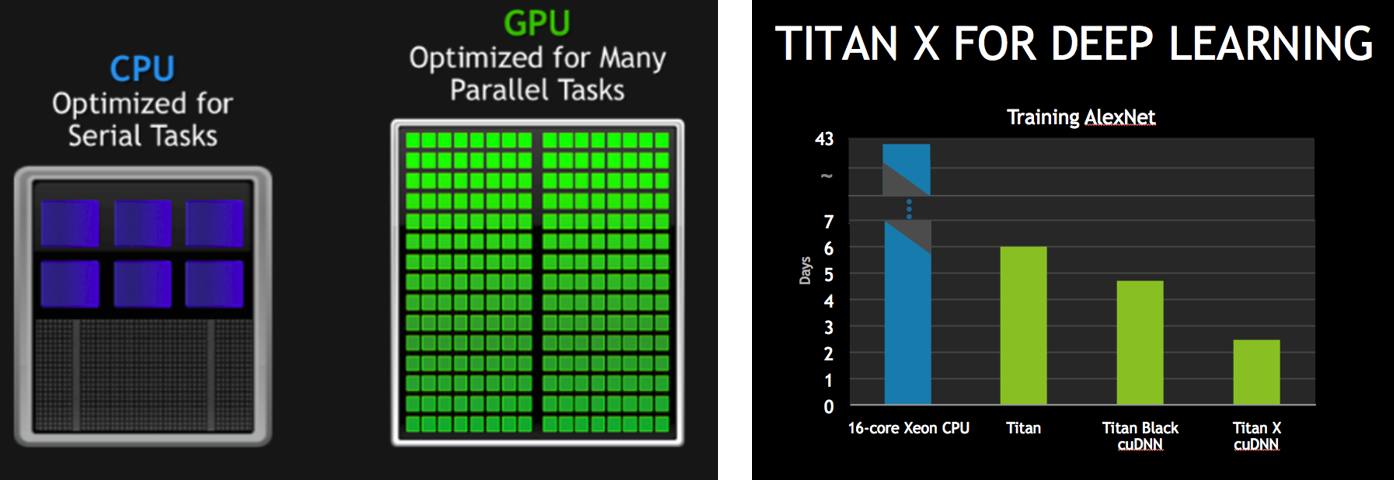

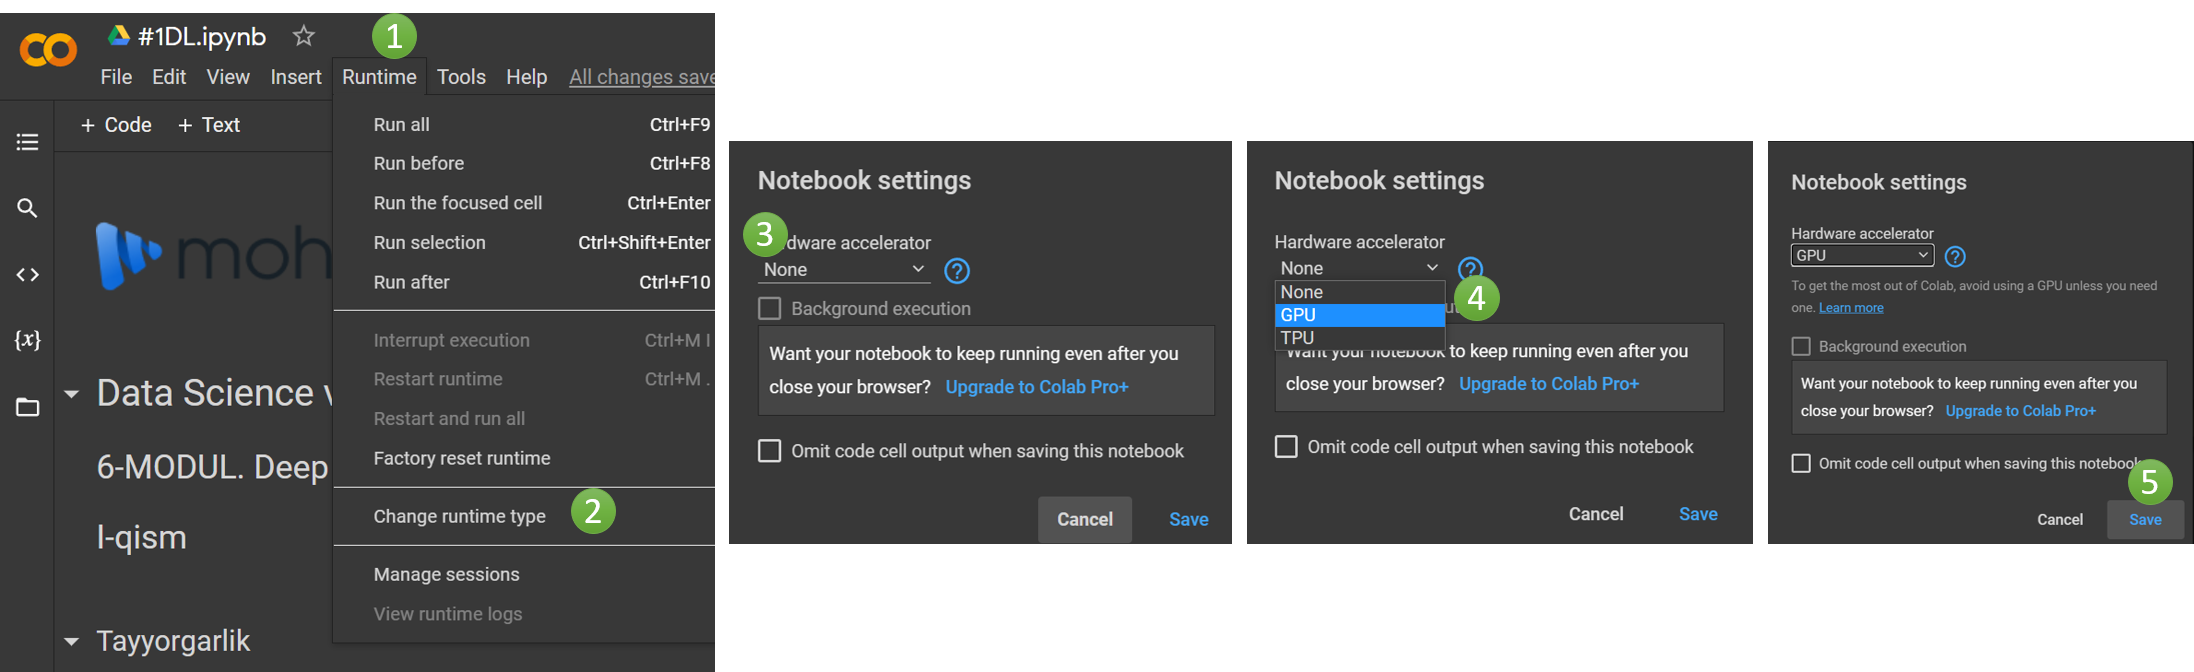

#### GPU to'g'ri ishlayotganligini `torch.cuda.is_available()` orqali tekshirib olamiz.
#### Natija: `True` ekanligiga ishonch hosil qiling

In [ ]:
import torch
torch.cuda.is_available()

True

#### Kutubxonalarni o'rnatib olamiz

Bizga kerak bo'ladi:

 - `fastai==2.5.3` versiyasi
 - `torch==1.10.0+cu111` versiyasi

Eslatma: Kurs yozilgan vaqtda yuqoridagi versiyalardan foydalanilgan.

In [ ]:
# !pip install fastai==2.5.3

#### Kutubxonalarni tekshirib olamiz

In [ ]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.10.0+cu111
2.5.3


# Birinchi Modelimizni quramiz

### Maqsad: Sun'iy Neyron Tarmoqlari yordamida mushuklarni taniy oladigan model qurish.

**Model haqida:** *Biz bu yerda `resnet34` deb nomlanuvchi qariyb `1.3` mln ta rasm yordamida o'qitilgan modeldan foydalanamiz.*

**Dataset:** *Oxford-IIIT Pet Dataset (`7349` ta mushuk(cat) va it(dog)larning rasmidan tashkil topgan dataset)*

In [ ]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.170000,0.028181,0.989175,01:08


epoch,train_loss,valid_loss,accuracy,time
0,0.058056,0.019914,0.995264,01:16
1,0.033489,0.011570,0.996617,01:15


### Model ishlashini tekshirib ko'ramiz


In [ ]:
# rasm yuklash uchun widget
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Mushukmi?: True
Aniqlilik ehtimologi: 1.000


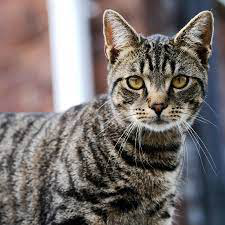

In [ ]:
img = PILImage.create(upload.data[-1]) # rasm
pred, _, prob = learn.predict(img) # bashorat qilish (predict)
print(f'Mushukmi?: {pred}')
print(f'Aniqlilik ehtimologi: {prob[1].item():.3f}')
img

Birinchi modelingiz bilan tabriklaymiz!!!

### **Ammo biz hozir nima qildik va buni ortida nimalar turibdi? Mana shularni tushinib olish uchun mavzuga yuqoriroqdan nazar solamiz.**

Qilgan modelimiz neyron tarmoqlari yordamida tarbiyalandi va shuning uchun ham bu soha `Deep Learning` deb ataladi. Avvalgi darslarimizda ham aytganimizdek, `Deep Learning` neyron tarmoqlari yordamida `Machine Learning` bajarishi mumkin bo'lgan vazifalarni bajaradi. Shunday ekan, `Machine Learning`ni nima ekanligini yaxshi bilib olaylik (to'g'rirog'i takrorlab olaylik).  

#### **Klassik dastur**:
Odatda, biz dasturchi sifatida biror vazifani bajaruvchi dasturlar yozamiz. Bu dasturlarni yozishdan avval qanday qilib shu vazifani bajarish ketma-ketligini tasavvur qilib olamiz, so'ngra kod yozishni boshlaymiz. Masalan, tartibsiz list elementlarini tartiblash uchun taxminan funksiya yozadigan bo'lsak, funksiyamizning ko'rinishi quyidagi rasmdagidek bo'ladi. (Bu yerda: Kirish- tartiblanmagan list, Natijalar-tartiblangan list)

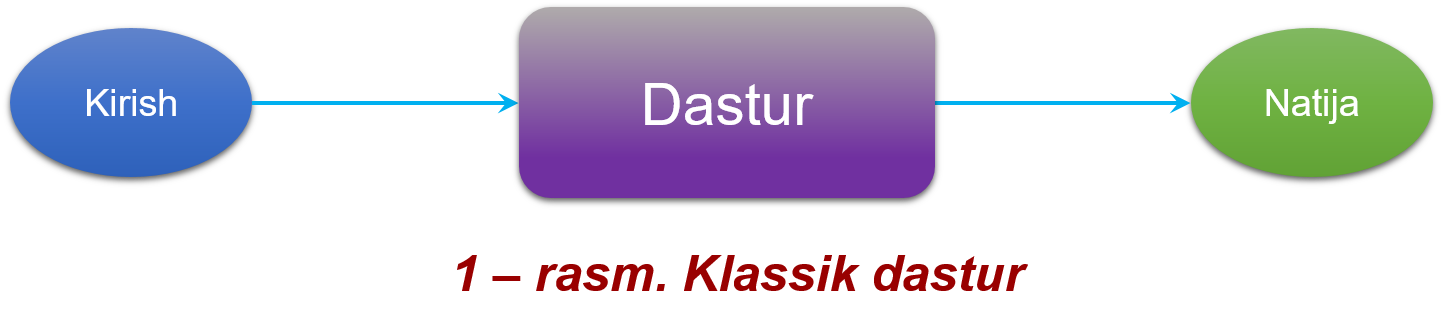

Text(0.5, 1.0, 'x*70')

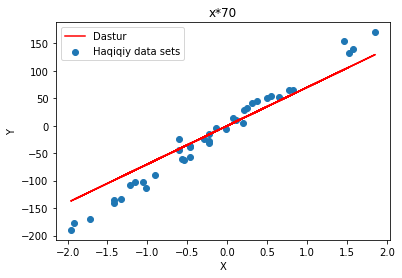

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]



def classic_program(x): return x*70

y_pred = [classic_program(x) for x in x_data]

# plotting
plt.scatter(x_data, y_data, label='Haqiqiy data sets')
plt.plot(x_data, y_pred, 'r', label='Dastur')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('x*70')

#### Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would “learn” from its experience.


(1961) *Arthur Samuel*  
“Artificial Intelligence: A Frontier of Automation”

______________________________________________________________________________

Yuqorida keltirilgan maqolada bir qancha yangicha fikrlar ilgari surilgan:
 - "weight assignment (vazn qo'llanilishi)" g'oyasi
 - "weight assignmentlarni qo'llash orqali modelning ishlash ko'rsatgichini o'zgartirish
 - Mashinalarni o'z tajribasidan o'rganishini avtomatlashtirib qo'yish mumkinligi va biz bu jarayonlarni ikir-chikirigacha bajarishimiz shart emasligi

**Vazn qo'llanilgan dastur:**

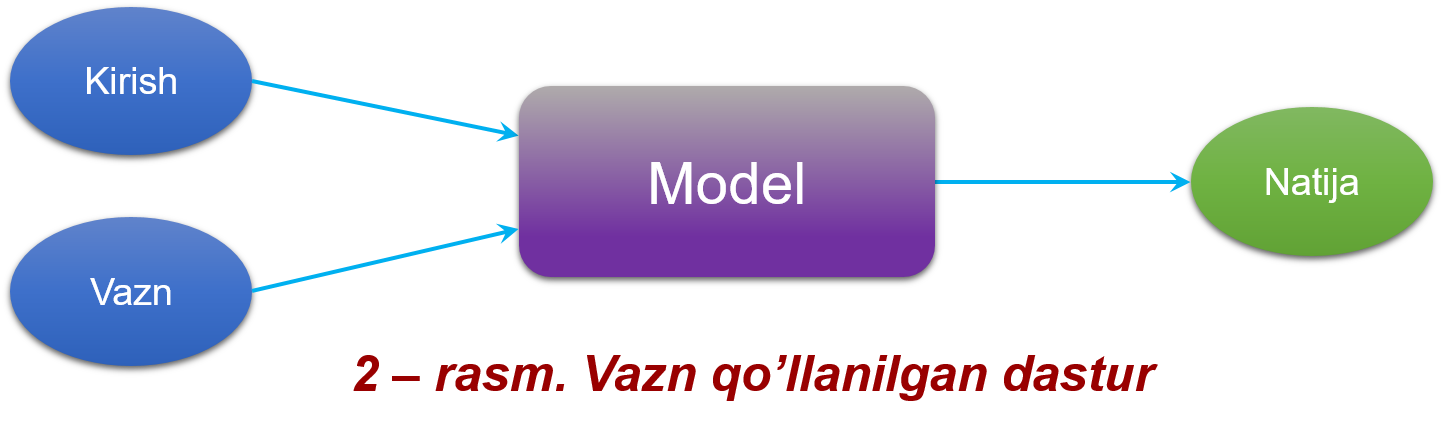

Text(0.5, 1.0, '1.3*x*70')

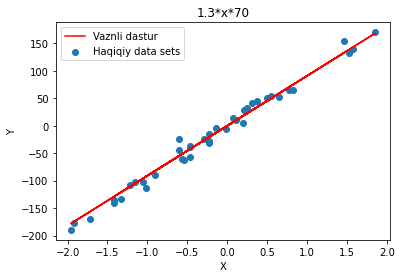

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]



def weight_assigned_program(x, w): return w*x*70

w = 1.3

y_pred = [weight_assigned_program(x, w) for x in x_data]

# plotting
plt.scatter(x_data, y_data, label='Haqiqiy data sets')
plt.plot(x_data, y_pred, 'r', label='Vaznli dastur')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(f'{w}*x*70')

`Dastur` endi `Model` deb yuritilinmoqda. Sababi model ham o'zi dastur hisoblanib, dasturdan farqli o'laroq endi parameterlarga ham ega bo'ladi.

#### **Machine Learning modeli:**

........... .We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would “learn” from its experience.


(1961) *Arthur Samuel*  
“Artificial Intelligence: A Frontier of Automation”

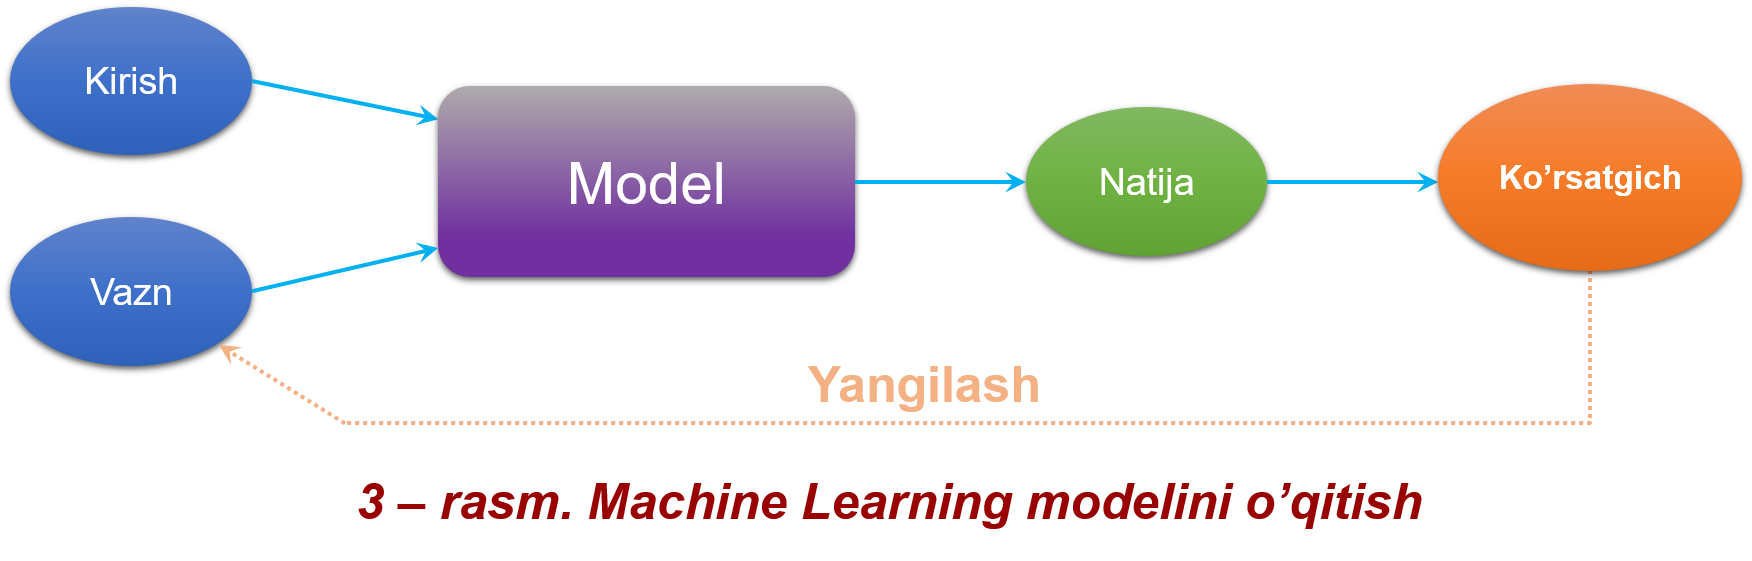

Text(0.5, 1.0, '94.448x+-0.243')

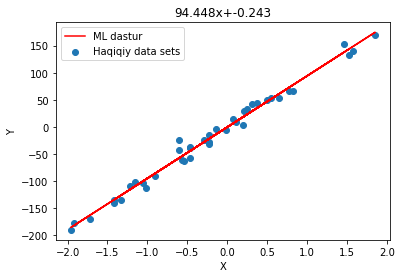

In [ ]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]

# regressiya
regression = LinearRegression().fit(x_data, y_data)
y_pred = regression.predict(x_data)


# plotting
plt.scatter(x_data, y_data, label='Haqiqiy data sets')
plt.plot(x_data, y_pred, 'r', label='ML dastur')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
equation = f'{regression.coef_[0]:.3f}x+{regression.intercept_:.3f}'
plt.title(equation)

### Deep Learning modeli:

Deep Learningda bir qancha terminlarda o'zgarishlarni kuzatish mumkin:
 - `Model` endilikda `Arxitektura` deb yuritilinadi (`model` deb yuritilishini ko'p uchratamiz, shuning uchun har ikkila atamalarni ishlataverilsa bo'ladi)
 - `Vazn`lar endilikda `parametr`lar deb yuritilinadi
 - `Arxitekture(Model)`dan chiqayotgan natija `bashorat(prediciton)` deyiladi
 - `Ko'rsatgich(Performance)` ning o'lchami endi `xatolik(loss)` deyiladi

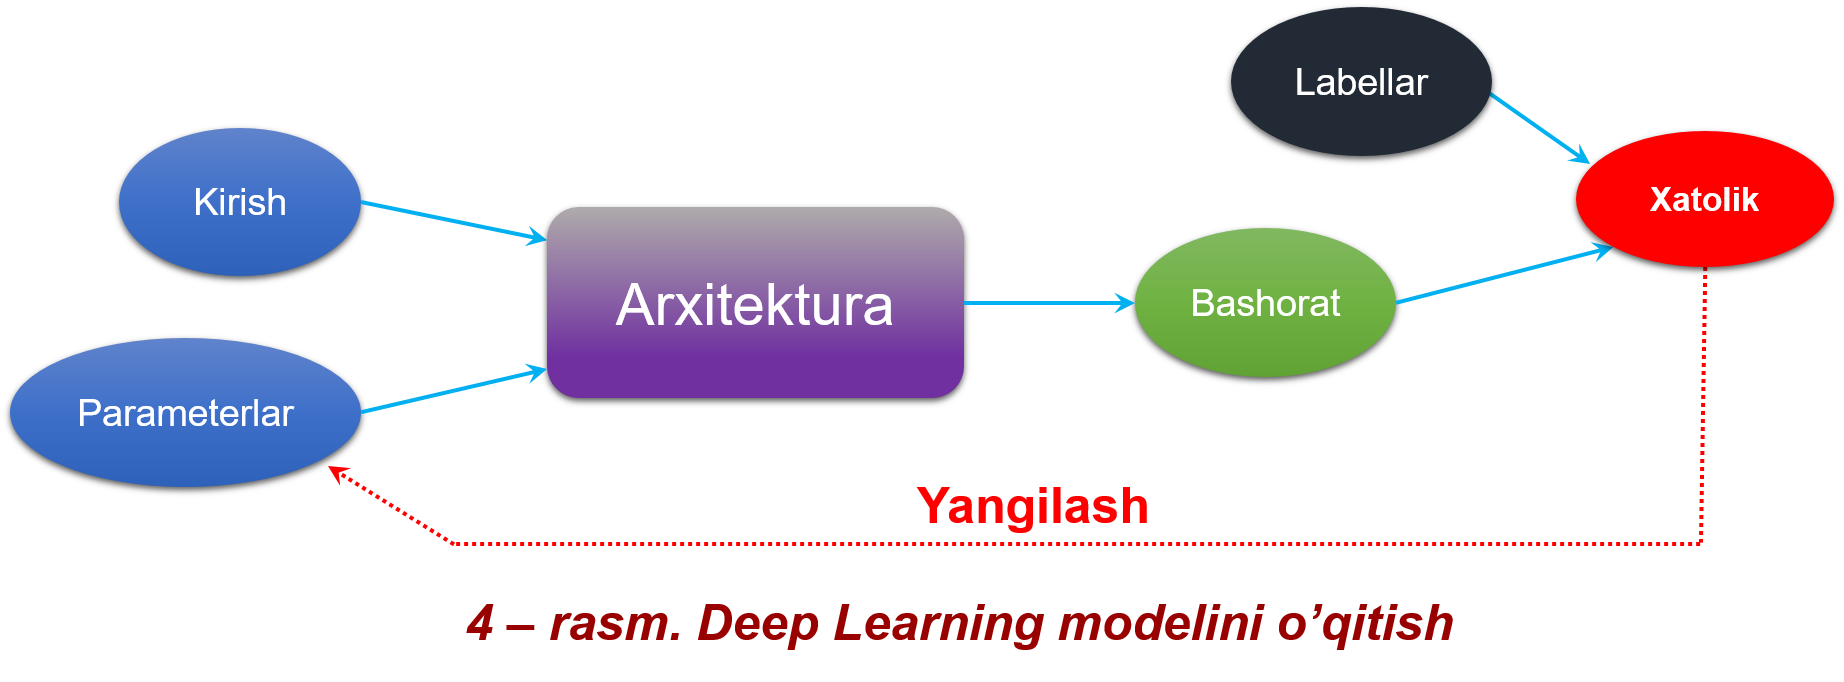

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


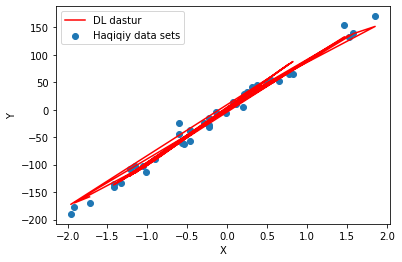

In [ ]:
from sklearn.datasets import make_regression
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# data
data = make_regression(n_samples=40, n_features=1, noise=10, random_state=42)
x_data, y_data = data[0], data[1]

# regressiya
regression = MLPRegressor(max_iter=2000).fit(x_data, y_data)
y_pred = regression.predict(x_data)


# plotting
plt.scatter(x_data, y_data, label='Haqiqiy data sets')
plt.plot(x_data, y_pred, 'r', label='DL dastur')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Qanday qilib bizning rasmni taniydigan modelimiz ishlaydi?

### Keling, qanday qilib biz avval qurgan modelimiz qanday ishladi, mana shularni birin ketin tahlil qilamiz.


In [ ]:
# kutubxonlar
from fastai.vision.all import *
from ipywidgets import widgets

# data
path = untar_data(URLs.PETS)/'images'

# labellovchi funksiya
def is_cat(x): return x[0].isupper()

# datalarni yuklovchi (dataloaders)
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

# o'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

In [ ]:
# kutubxonlarni chaqirish
from fastai.vision.all import *
from ipywidgets import widgets

Computer vision modellarini yaratish imkonini beruvchi bir qancha funksiyalar hamda classlardan foydalanish imkoniyatini beradi

In [ ]:
# datani yuklab olib uni zip fayldan extrakt qilish, agar yuklab olingan bo'lsa unda faqat zipdan extrakt qiladi
path = untar_data(URLs.PETS)/'images'

bu qatordagi kodimiz esa, 7349 ta mushuk(cat) va it(dog)larning rasmidan tashkil topgan Oxford-IIIT Pet Datasetini yuklab oladi va zip fayldan ozod qiladi(extract) va manzilni qaytaradi (agar dataset avvaldan yuklangan bo'lsa, unda faqat zip fayldan ozod qiladi va manzilni qaytaradi)

Datasetdagi har bir rasmning nomlanishi shu rasmni labeli hisoblanadi, masalan great_pyrenees_29.jpg rasmi datasetdagi 29-chi Great Pyrenees nomli itning rasmi.

`E'tibor bering:` Datasetdagi barcha mushuklarning rasmining bosh harflari katta harflarda berilgan, qolganlari esa kichik harfda berilgan. Biz buni labellashda qulaylik uchun ishlatamiz.

`fastai` ning maxsus `from_name_func` metodi mavjud bo'lib, bu funksiya yordamida fayl nomlarini label sifatida ajratib olish imkoniyatini beradi.

In [ ]:
# Funksiya yaratib olamiz
def is_cat(x): return x[0].isupper() # ushbu funksiya dataning bosh harfi katta harf bilan boshlansa True aks holda False qaytaradi

# fastaiga biz datasetimiz qayerda va qanday ko'rinishda ekanligini aytishimiz kerak
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

`ImageDataLoaders` klassi yordamidan foydalanib biz datsetimizni yuklab ularni training jarayoniga tayyor qilib olamiz.

- `path` - bu biroz avval yaratib olgan Path Objectimiz ya'ni datasetimiz turgan manzil
- `get_image_files(path)` - rasmlarni ko'rsatilgan manzildan oluvchi funksiya
- `valid_pct` - validation uchun ajratib olingan ulush (0.2 bu umumiy datasetning 20%i validation uchun olib qo'yilmoqda degani).
- `seed` - train jarayonida datalarning tartibi modelga aralash holatda keladi, bu esa modelni har gal har xil datalarda train qilinishiga olib kelishi mumkin, `seed` mana shu aralash tartibni doim bir xil ko'rinishda ushlab turishga xizmat qiladi
- `label_func` - bu yerga biz labelga ajratuvchi funksiyamizni uzatamiz
- `item_tfms` - rasmlarni shakllini tuzilshini o'zgartirish imkonini beruvchi va ularni tensorlar ko'rinishiga kelturuvchi funksiya

Navbatdagi qatorimiz esa, `Convolutional Neural Networks (CNN)` modeli yordamida modelimizni train qilish.

In [ ]:
# bu qatorda biz tayyorlab olgan datasetimizni (dls), modelni (resnet34) va metric larni uzatamiz
learn = cnn_learner(dls, resnet34, metrics=accuracy)

### **Arxitektura:**

Biz CNN da qo'llanilgan, `resnet34` arxitekturasidan foydalandik.

Nima uchun CNN? Sababi, hozirgi kunda Computer Vision sohasida bu usulni qo'llanilishi juda ham keng tarqalgan va qolgan usullarga qaraganda samaraliroq. Keyinchalik CNN va boshqa arxitekturalar haqida ham to'xtalib o'tamiz.

Arxitektura qurish - arxitektura qurish bu deep learningni o'ta muhim qismi deb o'ylamayman. Bu haqida ko'proq tadqiqotchilar, akademiya olamidagi kishilar bosh qotirishni yaxshi ko'rishadi. Aytmoqchimizki, bir qancha standart modeller bor va ularni ko'pchilik holatda qo'llash mumkin. Mana shunday modellerdan biri `ResNet` deb ataladi. Biz modelimizda qurishda `ResNet34` dan foydalandik, ushbu modelning (18, 50, 101 va 152) ko'rinishlari ham mavjud. Bu raqamlar model arxitekturasidagi qatlamlar(layers) sonini anglatadi. Qo'shimcha qilib aytishimiz kerakki, layerlar soni oshgan sari train uchun ko'proq vaqt talab qilinadi.

### **Metrics:**
Bu modelning qay darajada aniq ishlashini belgilab beradigan parameter. Biz metrics sifatida `accuracy`dan foydalandik va bu bizga qanchalik modelimiz aniq ishlayotganligini ko'rsatadi (takroran aytamiz, `fastai`da accuracy `validation set` yordamida olinadi. Yana bir boshqa `error_rate` deb nomlanuvchi metric ham mavjud, bu esa modelning qay darajada xato ishlayotganligini ko'rsatadi shunchaki matematik ko'rinishdagi ifodasi `(1-accuracy)`.

Eng oxirgi qatorimiz:

Bu qatordagi kodimizda, biz model qanday qilib `fine_tune` qilinishini ko'rishimiz mumkin.

In [ ]:
learn.fine_tune(2)

### **Fine-Tune**:
`Fine-tune` - bu `transfer-learning`da ishlatilinadigan texnika bo'lib, bu orqali biz modelning barcha qismini emas faqat bosh(head) qisminigina train qilamiz.

Endi sizda savol tug'iladi,  `transfer-learning` nima? Ana endi `transfer-learning` nima ekanligini tushunib olamiz, va shu bilan sizlarda mushukni taniy oladigan modelimiz qanday qurilganligi haqida to'liq tushuncha paydo bo'ladi.

## Transfer Learning

`Transfer Learning (TL)` - bu ML da qo'llaniladigan ilmiy texnika hisoblanib, bir muommoni hal qilishda ortirilgan tajribani boshqa bir (o'xshashroq) muommoni hal qilishda qo'llaniladi. Masalan avtomabillarni rasmini tanuvchi modeldan ortirilgan tajriba yuk moshinalarini rasmini tanishda ishlatilinishi mumkin.


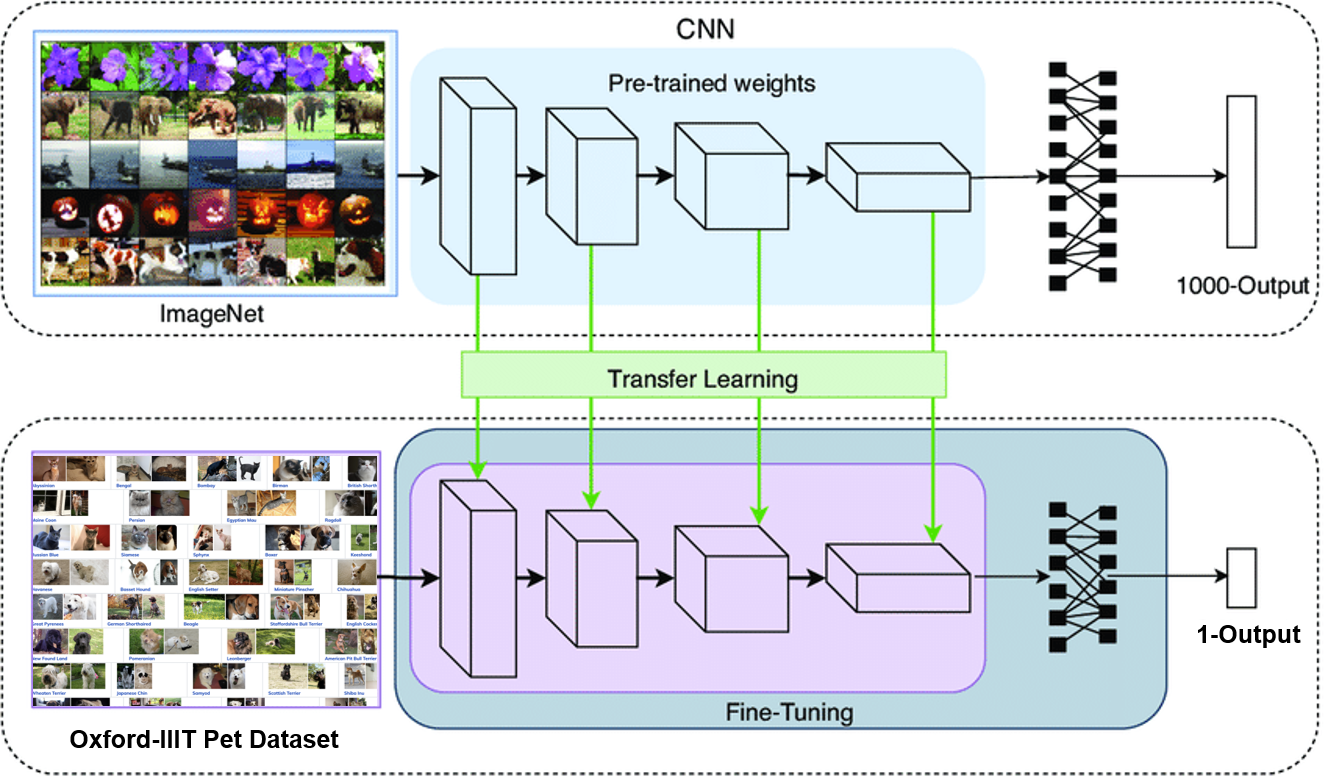

# Natija:
**Fastai doimo `validation set` dan kelib chiqgan holatda, bizga modelning `aniqligini(accuracy)` ko'rsatadi.**

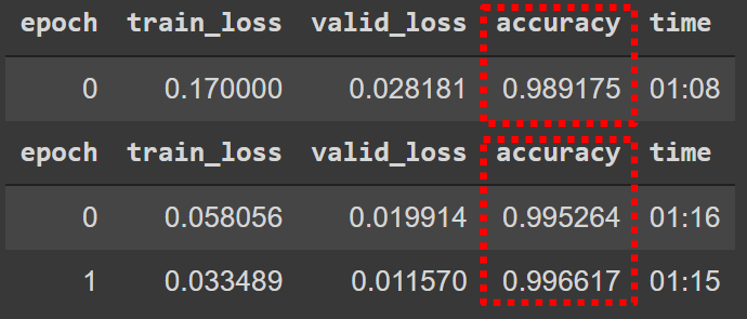

Sababi, biz model qurganimizda modelimiz bizdagi mavjud datalarni ko'rib ularni labellariga qarab parameterlarini moslab oladi, lekin bizga modelemiz faqat bizdagi dataset uchungina emas, balki boshqa datalar bilan ham ishlay olishi muhim. Aynan shuning uchun ham, test va validation uchun datasetlar olib qo'yiladi. Ya'ni modelimiz train qilinishi jarayonida umuman ko'rmagan datalar orqali modelimiz sinab ko'riladi.
____________________________________________________________________
Demak, model training jarayonida ko'rgan datalariga o'z parameterlarini o'ta moslab olishi bu `overfitting` deyilsa, o'ta moslab ololmasligi `underfitting` deyiladi. Doim biz `optimal` yechimni topishimiz kerak.

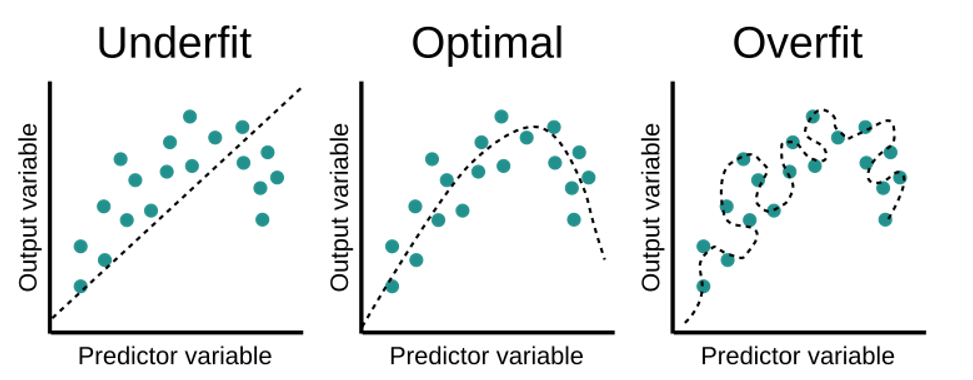